# Amazon Beauty Product Ratings

In [1]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import pyspark
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession

%matplotlib inline

## Load Data

In [430]:
# https://www.kaggle.com/skillsmuggler/amazon-ratings
products = pd.read_csv("ratings_Beauty 2 copy.csv")

products.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
# products['Timestamp'] = products["Timestamp"].astype(str)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [6]:
#getting rid of rows not in 2014 (selecting only rows where Timestamp starts with 14)
products = products[(products["Timestamp"]>=1400000000) & (products["Timestamp"]<1500000000)]
products.reset_index(inplace=True)
products.drop("index", axis=1, inplace = True)
products

,UserId,ProductId,Rating,Timestamp
0,A1Z513UWSAAO0F,0558925278,5.0,1404691200
1,AKJHHD5VEH7VG,0762451459,5.0,1404518400
2,A3V3RE4132GKRO,130414089X,5.0,1401840000
3,A1RXI3A1E99112,1304351475,5.0,1405296000
4,A3SWQ2QQ7JBPFA,1304351475,5.0,1402790400
5,A2YFDS6DYGFLVQ,1304351475,5.0,1405036800
6,AJ85OD05LNNUY,1304622657,2.0,1404172800
7,A2P8AUMTM6O605,1403790965,5.0,1403913600
8,A2FTLN4PYZE7S6,1403790965,5.0,1403827200
9,A276N142RFK6EF,3222000565,5.0,1404345600


In [299]:
products.reset_index()
products.head()

,UserId,ProductId,Rating,Timestamp
0,A1Z513UWSAAO0F,0558925278,5.0,1404691200
1,AKJHHD5VEH7VG,0762451459,5.0,1404518400
2,A3V3RE4132GKRO,130414089X,5.0,1401840000
3,A1RXI3A1E99112,1304351475,5.0,1405296000
4,A3SWQ2QQ7JBPFA,1304351475,5.0,1402790400


## EDA

In [9]:
# Mean rating for each Product

product_rating = products.groupby('ProductId')['Rating'].mean()
product_rating

ProductId
0558925278    5.000000
0762451459    5.000000
130414089X    5.000000
1304351475    5.000000
1304622657    2.000000
1403790965    5.000000
3222000565    5.000000
3227001055    5.000000
3227001381    4.000000
4057362967    5.000000
5357955751    5.000000
5357955832    5.000000
5357956111    5.000000
602260074X    4.333333
6022600812    5.000000
6041134473    5.000000
604113449X    2.500000
6117036094    5.000000
6165151329    2.000000
6165290582    3.000000
6167061580    4.500000
6169040335    5.000000
7539914718    1.000000
7800558258    1.000000
7806397051    3.000000
7842953384    5.000000
7899123011    2.000000
8096399322    5.000000
8329000710    4.666667
8901110814    4.000000
                ...   
B00LDNHQN2    4.000000
B00LDT13RQ    5.000000
B00LDW3F88    5.000000
B00LEWE6RG    5.000000
B00LFW4WW4    5.000000
B00LFWG7EU    5.000000
B00LG63DOM    4.818182
B00LGY1VT8    5.000000
B00LH25A32    5.000000
B00LH28Q88    5.000000
B00LH4LD1I    5.000000
B00LH50A0C    5.000000
B

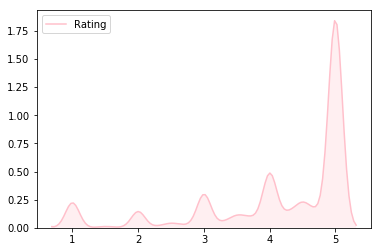

In [10]:
# Mean rating KDE distribution
#lots of 5 star ratings...probably because a product could be rated 5 stars, but could only be rated by one person

ax = sns.kdeplot(product_rating, shade=True, color='pink')
plt.show()
#how to see what is on y axis- sns

In [11]:
#this cell shows us the products with multiple ratings.
#higher variance, can show us the more popular products(more bought)
product_var = products.groupby('ProductId')['Rating'].var()
product_var = product_var.fillna(0.0)
product_var

ProductId
0558925278    0.000000
0762451459    0.000000
130414089X    0.000000
1304351475    0.000000
1304622657    0.000000
1403790965    0.000000
3222000565    0.000000
3227001055    0.000000
3227001381    0.000000
4057362967    0.000000
5357955751    0.000000
5357955832    0.000000
5357956111    0.000000
602260074X    0.333333
6022600812    0.000000
6041134473    0.000000
604113449X    4.500000
6117036094    0.000000
6165151329    0.000000
6165290582    0.000000
6167061580    0.500000
6169040335    0.000000
7539914718    0.000000
7800558258    0.000000
7806397051    1.714286
7842953384    0.000000
7899123011    0.000000
8096399322    0.000000
8329000710    0.333333
8901110814    2.000000
                ...   
B00LDNHQN2    0.000000
B00LDT13RQ    0.000000
B00LDW3F88    0.000000
B00LEWE6RG    0.000000
B00LFW4WW4    0.000000
B00LFWG7EU    0.000000
B00LG63DOM    0.163636
B00LGY1VT8    0.000000
B00LH25A32    0.000000
B00LH28Q88    0.000000
B00LH4LD1I    0.000000
B00LH50A0C    0.000000
B

In [410]:
#rating x is what that user rated that product
#rating is variance of rating??
df = (pd.merge(products, product_var, on='ProductId'))
df = df[df.Rating_y != 0.0]
df.head()

,UserId,ProductId,Rating_x,Timestamp,Rating_y
16,A328DC9RTOA5WS,602260074X,4.0,1403913600,0.333333
17,A1B9XPHEGQ986Y,602260074X,5.0,1402012800,0.333333
18,AH9GYBKL6KJOF,602260074X,4.0,1402358400,0.333333
21,A3UQXZCB1CXFNL,604113449X,1.0,1403654400,4.500000
22,A3T58OUIBEL24K,604113449X,4.0,1401580800,4.500000


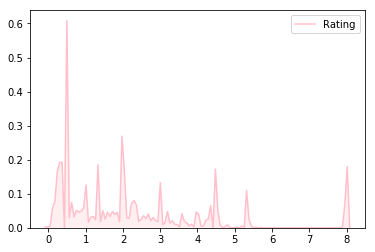

In [13]:
#we can see below that there are many products that have 5 ratings,
#but have only been rated by one person
#we for the sake of this project
#we will delete everything with a 0.0 amt of variance
ax = sns.kdeplot(product_var, shade=True, color='pink')
plt.show()

## Below is all products with two or more ratings

In [14]:
#selecting products with variance.. because we dont want products where only one person rated it a 5.. not popular
multiple_ratings = product_var.loc[product_var > 0.000000]
multiple_ratings.head()

ProductId
602260074X    0.333333
604113449X    4.500000
6167061580    0.500000
7806397051    1.714286
8329000710    0.333333
Name: Rating, dtype: float64

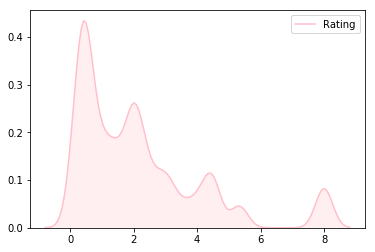

In [15]:
ax = sns.kdeplot(multiple_ratings, shade=True, color='pink')
plt.show()

In [16]:
# multiple_ratingss = product_var.drop([product_var == 0.000000])
# multiple_ratingss.toframe()

In [17]:
#make into dataframe 
multiple_ratings = multiple_ratings.to_frame()
multiple_ratings.head()

,Rating
ProductId,
602260074X,0.333333
604113449X,4.500000
6167061580,0.500000
7806397051,1.714286
8329000710,0.333333


## Feature Engineering

In [18]:
# Count of the number of ratings per Product
#(for every product rated more than once)

product_rating_count = products.groupby('ProductId')['Rating'].count()
product_rating_count1 = (product_rating_count.loc[product_rating_count != 1])
product_rating_count1

ProductId
1304351475      3
1403790965      2
602260074X      3
604113449X      2
6167061580      2
7806397051      8
8096399322      2
8329000710      3
8901110814      2
9511181564      2
9742189889      2
9746427962      5
9759091062      6
9788071198      3
9788071260      2
9788071597      2
9788073263      2
9788073840      2
9789820615      2
9790778309     15
9790779968      3
979078127X      5
9790781687      3
9790785232      2
9790787839      2
9790790961     11
9790792220      2
9790792271      2
9790798075      4
979079858X      2
             ... 
B00L4SM46U     11
B00L5BXG36     12
B00L5C3MU2      4
B00L5DI5K8     22
B00L5HUNPO      2
B00L5JHZJO    318
B00L5KTZ0K     15
B00L6Q3BH6     15
B00L77WTU4      2
B00L7BX4FE      6
B00L88S190      7
B00L8JBNE4     12
B00L9EN0GC      2
B00LAGG01G      9
B00LAOMUUS     16
B00LBEXC3Q      3
B00LBMK2KO      2
B00LCE23JE     14
B00LCEROA2     23
B00LCLFMDG      6
B00LEWE6RG      5
B00LFWG7EU      3
B00LG63DOM     11
B00LGY1VT8      2


In [19]:
# Data frame with calculated fields and measures

#this is the mean rating witht the amount of counts that product had. 
#wanted to select all products with ratings higher than one, because its a large dataset 

unique_products_list = products.ProductId.unique()
data_model = pd.DataFrame({'Rating': product_rating[unique_products_list],\
                           'Count': product_rating_count[unique_products_list]})
data_model =data_model.loc[product_rating_count != 1]
data_model.head()

,Rating,Count
ProductId,,
1304351475,5.000000,3
1403790965,5.000000,2
602260074X,4.333333,3
604113449X,2.500000,2
6167061580,4.500000,2


In [20]:
print("Data model shape (number of data points): %s" % str(data_model.shape))


Data model shape (number of data points): (29404, 2)


In [21]:
# created my own version on a weighted average.. kind of. 
#I took each mean rating per product, and multiplied that score
#by the amount(count) of votes that product had,
#then i decided i would call that my weighted average, and group by 
#that number, the outcome is below

In [22]:
V = data_model['Count']
R = data_model['Rating']

data_model['weighted_average'] = (V*R)

test= data_model.sort_values(by=["weighted_average"], ascending = False)
test

,Rating,Count,weighted_average
ProductId,,,
B00I073WLE,4.534398,814,3691.0
B001MA0QY2,4.361702,752,3280.0
B00IALDHDI,4.094980,737,3018.0
B00GP184WO,4.294416,394,1692.0
B00KWFDBKE,4.757396,338,1608.0
B00L5JHZJO,4.301887,318,1368.0
B00GFBWWWC,4.555556,288,1312.0
B00F008GFQ,4.870079,254,1237.0
B00H93NJLS,4.567100,231,1055.0


In [225]:
#wanted to create a list so we could use it for the visualisations 
sample = test.head(50)
asinlist = sample.index.tolist()
len(asinlist)

50

<IPython.core.display.Javascript object>


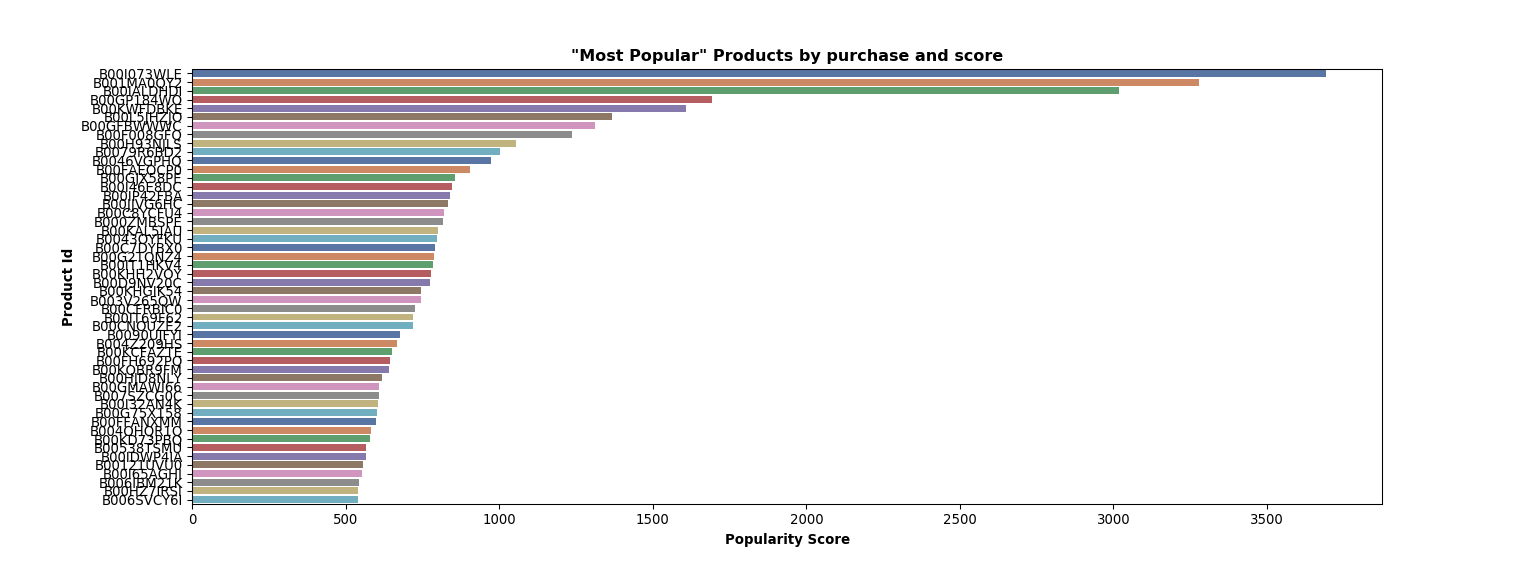

In [226]:

popular = sample.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['weighted_average'], y=popular.index, data=popular, palette='deep')

plt.title('"Most Popular" Products by purchase and score', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Product Id', weight='bold')


plt.savefig('popular_products.png')

## Scraping Amazon

In [227]:
from lxml import html  
import csv,os,json
import requests
from time import sleep

def AmzonParser(url):
	headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'}
	page = requests.get(url,headers=headers)
	while True:
		sleep(3)
		try:
			doc = html.fromstring(page.content)
			XPATH_NAME = '//h1[@id="title"]//text()'
			XPATH_SALE_PRICE = '//span[contains(@id,"ourprice") or contains(@id,"saleprice")]/text()'
			XPATH_ORIGINAL_PRICE = '//td[contains(text(),"List Price") or contains(text(),"M.R.P") or contains(text(),"Price")]/following-sibling::td/text()'
			XPATH_CATEGORY = '//a[@class="a-link-normal a-color-tertiary"]//text()'
			XPATH_AVAILABILITY = '//div[@id="availability"]//text()'

			RAW_NAME = doc.xpath(XPATH_NAME)
			RAW_SALE_PRICE = doc.xpath(XPATH_SALE_PRICE)
			RAW_CATEGORY = doc.xpath(XPATH_CATEGORY)
			RAW_ORIGINAL_PRICE = doc.xpath(XPATH_ORIGINAL_PRICE)
			RAw_AVAILABILITY = doc.xpath(XPATH_AVAILABILITY)

			NAME = ' '.join(''.join(RAW_NAME).split()) if RAW_NAME else None
			SALE_PRICE = ' '.join(''.join(RAW_SALE_PRICE).split()).strip() if RAW_SALE_PRICE else None
			CATEGORY = ' > '.join([i.strip() for i in RAW_CATEGORY]) if RAW_CATEGORY else None
			ORIGINAL_PRICE = ''.join(RAW_ORIGINAL_PRICE).strip() if RAW_ORIGINAL_PRICE else None
			AVAILABILITY = ''.join(RAw_AVAILABILITY).strip() if RAw_AVAILABILITY else None

			if not ORIGINAL_PRICE:
				ORIGINAL_PRICE = SALE_PRICE

			if page.status_code!=200:
				raise ValueError('captha')
			data = {
					'NAME':NAME,
					'SALE_PRICE':SALE_PRICE,
					'CATEGORY':CATEGORY,
					'ORIGINAL_PRICE':ORIGINAL_PRICE,
					'AVAILABILITY':AVAILABILITY,
					'URL':url,
					}

			return data
		except Exception as e:
			print (e)


In [228]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [229]:
extracted_data = []

for i in asinlist:
    
    url = "http://www.amazon.com/dp/" + i
#     print ("Processing: " + url)
    # Calling the parser
    parsed_data = AmzonParser(url)
    if parsed_data:
        extracted_data.append(parsed_data)
        
        print(extracted_data)
    


[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}]
[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}]
[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.co

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

[{'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00I073WLE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B001MA0QY2'}, {'NAME': 'COVERGIRL Bombshell Curvaceous by LashBlast Mascara Very Black 0.66 fl oz (20 ml)', 'SALE_PRICE': '$14.99', 'CATEGORY': 'Beauty & Personal Care > Makeup > Eyes > Mascara', 'ORIGINAL_PRICE': '$14.99', 'AVAILABILITY': 'In stock.', 'URL': 'http://www.amazon.com/dp/B00IALDHDI'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00GP184WO'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/dp/B00KWFDBKE'}, {'NAME': None, 'SALE_PRICE': None, 'CATEGORY': None, 'ORIGINAL_PRICE': None, 'AVAILABILITY': None, 'URL': 'http://www.amazon.com/

In [300]:
# extracted_data = []
# for i in asinlist:
#     url = "http://www.amazon.com/dp/"+i
#     extracted_data.append(AmzonParser(url))
#     f=open('data.json','w')
#     json.dump(extracted_data,f,indent=8)
#     print(extracted_data)

In [301]:
len(extracted_data)

50

In [302]:
stats = pd.DataFrame(extracted_data)
stats

,AVAILABILITY,CATEGORY,NAME,ORIGINAL_PRICE,SALE_PRICE,URL
0,None,None,None,None,None,http://www.amazon.com/dp/B00I073WLE
1,None,None,None,None,None,http://www.amazon.com/dp/B001MA0QY2
2,In stock.,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,$14.99,$14.99,http://www.amazon.com/dp/B00IALDHDI
3,None,None,None,None,None,http://www.amazon.com/dp/B00GP184WO
4,None,None,None,None,None,http://www.amazon.com/dp/B00KWFDBKE
5,None,None,None,None,None,http://www.amazon.com/dp/B00L5JHZJO
6,None,None,None,None,None,http://www.amazon.com/dp/B00GFBWWWC
7,None,None,None,None,None,http://www.amazon.com/dp/B00F008GFQ
8,None,None,None,None,None,http://www.amazon.com/dp/B00H93NJLS
9,None,None,None,None,None,http://www.amazon.com/dp/B0079R6BD2


In [233]:
stats["ProductId"] = asinlist

In [234]:
stats = stats.drop("AVAILABILITY", axis =1)


In [235]:
stats = stats.drop("ORIGINAL_PRICE", axis =1)

In [236]:
stats = stats.drop("SALE_PRICE", axis =1)

In [237]:
stats = stats.dropna()

In [303]:
stats.head()

,AVAILABILITY,CATEGORY,NAME,ORIGINAL_PRICE,SALE_PRICE,URL
0,None,None,None,None,None,http://www.amazon.com/dp/B00I073WLE
1,None,None,None,None,None,http://www.amazon.com/dp/B001MA0QY2
2,In stock.,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,$14.99,$14.99,http://www.amazon.com/dp/B00IALDHDI
3,None,None,None,None,None,http://www.amazon.com/dp/B00GP184WO
4,None,None,None,None,None,http://www.amazon.com/dp/B00KWFDBKE


In [239]:
 final_df = (pd.merge(stats, test, on='ProductId'))


In [240]:
final_df

,CATEGORY,NAME,URL,ProductId,Rating,Count,weighted_average
0,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,737,3018.0
1,Beauty & Personal Care > Makeup > Eyes > Mascara,It's So BIG Volumizing Mascara (Black) by Eliz...,http://www.amazon.com/dp/B00FAEOCP0,B00FAEOCP0,4.248826,213,905.0
2,Beauty & Personal Care > Skin Care > Face > Tr...,"Dead Sea Mud Mask for Clear Skin, All Natural ...",http://www.amazon.com/dp/B00C8YCFU4,B00C8YCFU4,4.718391,174,821.0
3,Beauty & Personal Care > Skin Care > Face > Tr...,OZNaturals - Hyaluronic Acid Serum With Vitami...,http://www.amazon.com/dp/B00C7DYBX0,B00C7DYBX0,3.955000,200,791.0
4,Beauty & Personal Care > Hair Care > Hair Trea...,VoilaVe USDA and ECOCERT Pure Organic Moroccan...,http://www.amazon.com/dp/B00IT1HKV4,B00IT1HKV4,4.728916,166,785.0
5,Beauty & Personal Care > Skin Care > Eyes > Gels,"InstaNatural Eye Gel Cream - Wrinkle, Dark Cir...",http://www.amazon.com/dp/B00KCFAZTE,B00KCFAZTE,4.559441,143,652.0
6,Beauty & Personal Care > Skin Care > Eyes > Cr...,Adovia Eye Cream - Powerful Eye Gel for Eye Pu...,http://www.amazon.com/dp/B00KQBR9FM,B00KQBR9FM,4.686131,137,642.0
7,Health & Household > Vitamins & Dietary Supple...,HairAnew (Unique Hair Growth Vitamins with Bio...,http://www.amazon.com/dp/B00I65AGHI,B00I65AGHI,4.424000,125,553.0
8,Beauty & Personal Care > Skin Care > Face > Tr...,Vitamin C Serum 2 oz Luxury Size 22% ULTIMATE ...,http://www.amazon.com/dp/B00HZ7IRSI,B00HZ7IRSI,4.434426,122,541.0


In [241]:
final_df = final_df.drop("Count", axis =1)

In [242]:
# final_df = final_df.drop("weighted_average", axis =1)
final_df

,CATEGORY,NAME,URL,ProductId,Rating,weighted_average
0,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0
1,Beauty & Personal Care > Makeup > Eyes > Mascara,It's So BIG Volumizing Mascara (Black) by Eliz...,http://www.amazon.com/dp/B00FAEOCP0,B00FAEOCP0,4.248826,905.0
2,Beauty & Personal Care > Skin Care > Face > Tr...,"Dead Sea Mud Mask for Clear Skin, All Natural ...",http://www.amazon.com/dp/B00C8YCFU4,B00C8YCFU4,4.718391,821.0
3,Beauty & Personal Care > Skin Care > Face > Tr...,OZNaturals - Hyaluronic Acid Serum With Vitami...,http://www.amazon.com/dp/B00C7DYBX0,B00C7DYBX0,3.955000,791.0
4,Beauty & Personal Care > Hair Care > Hair Trea...,VoilaVe USDA and ECOCERT Pure Organic Moroccan...,http://www.amazon.com/dp/B00IT1HKV4,B00IT1HKV4,4.728916,785.0
5,Beauty & Personal Care > Skin Care > Eyes > Gels,"InstaNatural Eye Gel Cream - Wrinkle, Dark Cir...",http://www.amazon.com/dp/B00KCFAZTE,B00KCFAZTE,4.559441,652.0
6,Beauty & Personal Care > Skin Care > Eyes > Cr...,Adovia Eye Cream - Powerful Eye Gel for Eye Pu...,http://www.amazon.com/dp/B00KQBR9FM,B00KQBR9FM,4.686131,642.0
7,Health & Household > Vitamins & Dietary Supple...,HairAnew (Unique Hair Growth Vitamins with Bio...,http://www.amazon.com/dp/B00I65AGHI,B00I65AGHI,4.424000,553.0
8,Beauty & Personal Care > Skin Care > Face > Tr...,Vitamin C Serum 2 oz Luxury Size 22% ULTIMATE ...,http://www.amazon.com/dp/B00HZ7IRSI,B00HZ7IRSI,4.434426,541.0


In [243]:
Final =(pd.merge(final_df, products, on='ProductId'))
# Final = Final.sort_values(by=["weighted_average"], ascending = False)
Final

,CATEGORY,NAME,URL,ProductId,Rating_x,weighted_average,UserId,Rating_y,Timestamp
0,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A28YD0C5R271J,2.0,1404086400
1,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A7Z525G1C7H43,5.0,1404086400
2,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A3K6YKRIJACMGX,2.0,1403740800
3,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A6JSG8SDKLSST,4.0,1404086400
4,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A39IC46L32EZVH,4.0,1403481600
5,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A2HYVMO5Y57SWG,5.0,1403654400
6,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A3IO5AX2SA0C7P,3.0,1403481600
7,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A2M5KITO5GJIJ,5.0,1403568000
8,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A13SOJ90R63RSV,4.0,1403740800
9,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A1K1STNOMOILXX,4.0,1404086400


In [244]:
def product_rater(product_df,num, CATEGORY=None):
    userID = "AQYJ3M7J3QGMX"
    rating_list = []
    while num > 0:
        if CATEGORY:
            movie = product_df[product_df['CATEGORY'].str.contains(CATEGORY)].sample(1)
        else:
            movie = product_df.sample(1)
        print(movie)
        rating = input('How do you rate this product on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':Final["UserId"],'movieId':Final['ProductId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie)
            num -= 1
    return rating_list

In [304]:
product_rater(final_df,4,"Face")

                                            CATEGORY  \
2  Beauty & Personal Care > Skin Care > Face > Tr...   

                                                NAME  \
2  Dead Sea Mud Mask for Clear Skin, All Natural ...   

                                   URL   ProductId    Rating  weighted_average  
2  http://www.amazon.com/dp/B00C8YCFU4  B00C8YCFU4  4.718391             821.0  
How do you rate this product on a scale of 1-5, press n if you have not seen :
4
                                            CATEGORY  \
3  Beauty & Personal Care > Skin Care > Face > Tr...   

                                                NAME  \
3  OZNaturals - Hyaluronic Acid Serum With Vitami...   

                                   URL   ProductId  Rating  weighted_average  
3  http://www.amazon.com/dp/B00C7DYBX0  B00C7DYBX0   3.955             791.0  
How do you rate this product on a scale of 1-5, press n if you have not seen :
5
                                            CATEGORY  \
3  Beauty 

[{'userId': 0        A28YD0C5R271J
  1        A7Z525G1C7H43
  2       A3K6YKRIJACMGX
  3        A6JSG8SDKLSST
  4       A39IC46L32EZVH
  5       A2HYVMO5Y57SWG
  6       A3IO5AX2SA0C7P
  7        A2M5KITO5GJIJ
  8       A13SOJ90R63RSV
  9       A1K1STNOMOILXX
  10      A2R8Y26OAJVQ6F
  11       AJDPW7O9NO0BM
  12      A2CBJB1QCBJXWQ
  13      A1PDKZQOY2N9IJ
  14       AM6IRYBRUABZD
  15      A1Y44H87JSA6M9
  16      A1VL3ETFVVIIBT
  17      A186OYG1CMZGK5
  18       A73Y4XEW37EEB
  19      A3N9VFQ70LXCA2
  20      A2QXZCAYVI7OK9
  21      A2JLJFYCSL3ZFY
  22      A2A4QGCOTV9ON3
  23      A1T6FRHVBQ2BI9
  24       AF9IHZTIOWJE7
  25       AZI7R0T342SSR
  26      A3980LAME9UWOL
  27      A3J1620N3CJ67P
  28       A1VQ5CMF8EW8F
  29      A2CGYB70RGUQNH
               ...      
  1987    A1HUQ89BM5PDQK
  1988    A2FAAXZ8AWWEOD
  1989    A3H7M136FDE3W8
  1990    A2MO2RC711BV9D
  1991    A3A9HEWU9PSB3H
  1992    A1KQNP8MOJDJKC
  1993    A25Y0VJVNKPXRH
  1994    A2KETXOHD7IH8N
  1995    A3W10

### Implementing Recommendation Engines with Surprise
## Collaborative Filtering with Surprise



In [246]:
#new_df= Final["UserId"]["ProductId"]["Rating"]
new_df = Final.loc[:, ["UserId","ProductId","Rating_y"]] 
new_df

,UserId,ProductId,Rating_y
0,A28YD0C5R271J,B00IALDHDI,2.0
1,A7Z525G1C7H43,B00IALDHDI,5.0
2,A3K6YKRIJACMGX,B00IALDHDI,2.0
3,A6JSG8SDKLSST,B00IALDHDI,4.0
4,A39IC46L32EZVH,B00IALDHDI,4.0
5,A2HYVMO5Y57SWG,B00IALDHDI,5.0
6,A3IO5AX2SA0C7P,B00IALDHDI,3.0
7,A2M5KITO5GJIJ,B00IALDHDI,5.0
8,A13SOJ90R63RSV,B00IALDHDI,4.0
9,A1K1STNOMOILXX,B00IALDHDI,4.0


In [247]:
#It's now time to transform the dataset into something compatible with Surprise. 
#In order to do this, you're going to need Reader and Dataset classes. 
#There's a method in Dataset specifically for loading dataframes.


from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(new_df,reader)

In [248]:
#Let's look at how many users and items we have in our dataset. If using neighborhood-based methods, 
#this will help us determine whether or not we should perform user-user or item-item similarity
dataset = data.build_full_trainset()
print('Number of users: ',dataset.n_users,'\n')
print('Number of items: ',dataset.n_items)

Number of users:  1806 

Number of items:  9


In [249]:
## add the new ratings to the original ratings DataFrame
# new_data = Dataset.load_from_df(new_df,reader)

# Implementing Recommendation Engines with Surprise
## Predicting rating specific product based on specific user 

In [250]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from surprise import Reader, Dataset


In [251]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [252]:
## add the new ratings to the original ratings DataFrame
# new_ratings_df = new_df.append(user_rating,ignore_index=True)
# new_data = Dataset.load_from_df(new_ratings_df,reader)

In [253]:
from surprise import Dataset
from surprise.model_selection import train_test_split

In [254]:
# split into train and test set.
trainset, testset = train_test_split(data,test_size=0.2)

In [255]:
print('Type trainset :',type(trainset),'\n')
print('Type testset :',type(testset))

Type trainset : <class 'surprise.trainset.Trainset'> 

Type testset : <class 'list'>


In [305]:
print(len(testset))
print(testset[1])

14237
('A28YD0C5R271J', 'B00C8YCFU4', 4.3173029251363415)


## Memory-Based Methods (Neighborhood-Based)


To begin with, we can calculate the more simple neighborhood-based approaches. Some things to keep in mind are what type of similarities you should use. These can all have fairly substantial effects on the overall performance of the model. You'll notice that the API of surprise is very similar to sci-kit learn when it comes to model fitting and testing. To begin with, we'll import the modules we'll be using for the Neighborhood-Based methods.



In [314]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

In [315]:
print('Number of users: ',trainset.n_users,'\n')
print('Number of items: ',trainset.n_items,'\n')


Number of users:  1806 

Number of items:  9 



In [259]:
sim_cos = {'name':'cosine','user_based':False}

In [260]:
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [261]:
basic.sim

array([[1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.99388373, 0.99613934, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 1.        , 0.99892863,
        0.        , 0.99478678, 0.99711547, 0.99770679],
       [0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.95223442, 1.        , 0.98994949],
       [1.        , 0.        , 0.99892863, 1.        , 1.        ,
        0.        , 0.98189796, 0.99665306, 0.9962406 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.99388373, 0.        , 0.99478678, 0.95223442, 0.98189796,
        0.        , 1.        , 0.98248239, 0.99832947],
       [0.99613934, 0.        , 0.99711547, 1.        , 0.99665306,
        0.        , 0.98248239, 1.        , 0.99571863],


In [316]:
predictions = basic.test(testset)
predictions

[Prediction(uid='A28YD0C5R271J', iid='B00FAEOCP0', r_ui=4.3173029251363415, est=4.306881587104773, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='A28YD0C5R271J', iid='B00C8YCFU4', r_ui=4.3173029251363415, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A28YD0C5R271J', iid='B00C7DYBX0', r_ui=4.3173029251363415, est=4.306881587104773, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='A28YD0C5R271J', iid='B00IT1HKV4', r_ui=4.3173029251363415, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A28YD0C5R271J', iid='B00KCFAZTE', r_ui=4.3173029251363415, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A28YD0C5R271J', iid='B00KQBR9FM', r_ui=4.3173029251363415, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A28YD0C5R271J', iid='B00I65AGHI', r_ui=4.3173029251363415, est=4.306881587104773, details={'was_impos

In [320]:
print(accuracy.rmse(predictions))

RMSE: 0.4562
0.45619595677943847


Pretty good! As you can see, the model had an RMSE of about 0.9226, meaning that it was off by roughly 1 points for each guess it made for ratings. But let's see if we can improve it. To begin with, let's try with a different similarity metric (pearson correlation) and evaluate our RMSE.

## Pearson's correlation 
### let's try it with pearson's correlation instead of KNNBasic

In [321]:
sim_pearson = {'name':'pearson','user_based':False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4562
0.45619595677943847


Pearson correlation seems to have performed better than cosine similarity in the basic KNN model, we can go ahead and use pearson correlation as our similarity metric of choice for future models. The next model we're going to try is KNN with Means. This is the same thing as the basic KNN model, except it takes into account the mean rating of each user or item depending on whether you are performing user-user or item-item similarities, respectively.

In [322]:
sim_pearson = {'name':'pearson','user_based':False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4666
0.4665996874747977


A little better... let's try one more neighborhood-based method before moving into more model-based methods. Let's try the [KNNBaseline](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline) method. This is a more advanced method because it adds in a bias term that is calculated by way of minimizing a cost function represented by:

$$ \sum_{r_{ui} \in R_{\text{train}}}{(\hat{r}_{ui} - ( \mu + b_{i} + b_{u}))^{2} + \lambda(b_u^2 + b_i^2) } $$

With $b_i$ and $b_u$ being biases for items and users respectively and $\mu$ referring to the global mean.

In [323]:
sim_pearson = {'name':'pearson','user_based':False}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4617
0.46174174554873776


Even better! Now let's see if we can get some insight by applying some matrix factorization techniques!

## Model-Based Methods (Matrix Factorization)


As with other sklearn libraries, we can expedite the process of trying out different parameters by using an implementation of GridSearch. Let's make use of the Gridsearch here to account for some different configurations of parameters within the SVD pipeline. This might take some time! You'll notice that the n_jobs parameter set to -1, which ensures that all of the cores on my computer will be used to process fitting and evaluating all of these models. To help keep track of what is occurring here, take note of the different values. This code ended up taking over 16 minutes to complete even with parallelization in effect, so the optimal parameters are given to you for the SVD model below. Use them to train a model and let's see how well it performs. If you want the full GridSearch experience, feel free to uncomment the code and give it a go!

In [324]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[20,100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1)
gs_model.fit(data)

In [325]:
svd = SVD(n_factors=100,n_epochs=10,lr_all=0.005,reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.1987
0.19871910342929447


Interestingly, this model performed worse than the others! In general, the advantages of matrix factorization starts to show itself when the size of the dataset becomes massive. At that point, the storage challenges increase for the memory-based models, and there is enough data for latent factors to become extremely apparent.

## Making Predictions

Now that we've explored some models, we can think about how we might fit the models into the context of an application. To begin with, let's access some basic functionality of surprise models to get predicted ratings for a given user and item. All that's needed are the user_id and item_id for which you want to make a prediction. Here we're making a prediction for a certain user and certain item using the SVD model we just fit.


In [326]:
#get predicted ratings for a given user and item  using the SVD model we just fit.
user_AQYJ3M7J3QGMX_prediction = svd.predict('AQYJ3M7J3QGMX','B001MA0QY2')
user_AQYJ3M7J3QGMX_prediction

Prediction(uid='AQYJ3M7J3QGMX', iid='B001MA0QY2', r_ui=None, est=4.3173029251363415, details={'was_impossible': False})

The output of the prediction is a tuple. Below, let's access the estimated rating.

In [327]:
#making predictions about certain items rated by certain users
user_AQYJ3M7J3QGMX_prediction[3]

4.3173029251363415


You might be wondering, "OK I'm making predictions about certain items rated by certain users, but how can I actually give a certain N recommendations to an individual user?" Although surprise is a great library, it does not have this recommendation functionality built into it. Next, I will not only be fitting recommendation system models, but also programmatically retrieving recommended items for each user.

## Determine the Best Model
Now, we compare the different models and see which ones perform best. For consistency sake, we will use RMSE to evaluate models. Always remember to cross-validate!

In [328]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [329]:
## Perform a gridsearch with SVD
params = {'n_factors' :[20,50,100],
         'reg_all':[0.02,0.05,0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [330]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.9685645270679352, 'mae': 0.7021666127577654}
{'rmse': {'n_factors': 100, 'reg_all': 0.1}, 'mae': {'n_factors': 50, 'reg_all': 0.02}}


In [ ]:
# #cross validating with KNNBasic
# knn_basic = KNNBasic(sim_options={'name':'pearson','user_based':True})
# cv_knn_basic= cross_validate(knn_basic,data,n_jobs=-1)

In [139]:
# # cross validating with KNNBaseline
# knn_baseline = KNNBaseline(sim_options={'name':'pearson','user_based':True})
# cv_knn_baseline = cross_validate(knn_baseline,data)

Based off these outputs, it seems like the best performing model is the SVD model with n_factors = 100 and a regularization rate of 0.05. Let's use that model to make some predictions.

## Making recommendations

This next section is going to involve making recommendations, and it's important that the output for the recommendation is interpretable to people. Rather than returning the movie_id values, it would be far more valuable to return the actual title of the movie. As a first step, let's read in the movies to a dataframe and take a peek at what information we have about them.



In [360]:
new_df2 = Final.loc[:, ["ProductId","NAME","CATEGORY"]] 


In [361]:
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

In [411]:
#(user id #2, item id of item #4 in list)
svd.predict(2,4)


Prediction(uid=2, iid=4, r_ui=None, est=4.3173029251363415, details={'was_impossible': False})

## Obtaining User Ratings


It's great that we have working models and everything, but wouldn't it be nice to get to recommendations specifically tailored to your preferences? That's what we'll be doing now. 

The first step is to create a function that allows me to pick randomly selected products. The function should present users with a movie and ask them to rate it. If they have not seen the movie, they should be able to skip rating it.

The function movie_rater should take as parameters:

movie_df : DataFrame - a dataframe containing the movie ids, name of movie, and genres
num : int - number of ratings
genre : string - a specific genre from which to draw movies
The function returns:

rating_list : list - a collection of dictionaries in the format of {'userId': int , 'movieId': int ,'rating': float }

In [363]:
# #this one!!
# def movie_rater(movie_df,num, CATEGORY=None):
#     userID = "AQYJ3M7J3QGMX"
#     rating_list = []
#     while num > 0:
#         if CATEGORY:
#             movie = movie_df[movie_df['CATEGORY'].str.contains(CATEGORY)].sample(1)
#         else:
#             movie = movie_df.sample(1)
#         print(movie)
#         rating = input('How do you rate this product on a scale of 1-5, press n if you have not seen :\n')
#         if rating == 'n':
#             continue
#         else:
#             rating_one_movie = {'userId':Final["UserId"],'movieId':Final['ProductId'].values[0],'rating':rating}
#             rating_list.append(rating_one_movie)
#             num -= 1
#     return rating_list

In [364]:
def movie_rater(movie_df,num, CATEGORY=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if CATEGORY:
            movie = movie_df[movie_df['CATEGORY'].str.contains(CATEGORY)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this product on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':Final["UserId"],'movieId':Final['ProductId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

In [365]:
user_rating 

[{'userId': 0        A28YD0C5R271J
  1        A7Z525G1C7H43
  2       A3K6YKRIJACMGX
  3        A6JSG8SDKLSST
  4       A39IC46L32EZVH
  5       A2HYVMO5Y57SWG
  6       A3IO5AX2SA0C7P
  7        A2M5KITO5GJIJ
  8       A13SOJ90R63RSV
  9       A1K1STNOMOILXX
  10      A2R8Y26OAJVQ6F
  11       AJDPW7O9NO0BM
  12      A2CBJB1QCBJXWQ
  13      A1PDKZQOY2N9IJ
  14       AM6IRYBRUABZD
  15      A1Y44H87JSA6M9
  16      A1VL3ETFVVIIBT
  17      A186OYG1CMZGK5
  18       A73Y4XEW37EEB
  19      A3N9VFQ70LXCA2
  20      A2QXZCAYVI7OK9
  21      A2JLJFYCSL3ZFY
  22      A2A4QGCOTV9ON3
  23      A1T6FRHVBQ2BI9
  24       AF9IHZTIOWJE7
  25       AZI7R0T342SSR
  26      A3980LAME9UWOL
  27      A3J1620N3CJ67P
  28       A1VQ5CMF8EW8F
  29      A2CGYB70RGUQNH
               ...      
  1987    A1HUQ89BM5PDQK
  1988    A2FAAXZ8AWWEOD
  1989    A3H7M136FDE3W8
  1990    A2MO2RC711BV9D
  1991    A3A9HEWU9PSB3H
  1992    A1KQNP8MOJDJKC
  1993    A25Y0VJVNKPXRH
  1994    A2KETXOHD7IH8N
  1995    A3W10

### Making Predictions With the New Ratings


Now that you have new ratings, you can use them to make predictions for this new user. The proper way this should work is:

-add the new ratings to the original ratings DataFrame,read into a Surprise dataset

-train a model using the new combined DataFrame

-make predictions for the user

-order those predictions from highest rated to lowest rated

-return the top n recommendations with the text of the actual movie (rather than just the index number)

In [366]:
# new_df2 = new_df.drop("Rating_y", axis =1)
# new_df2

In [367]:
## add the new ratings to the original ratings DataFrame
new_ratings_df = new_df.append(user_rating,ignore_index=True, sort=False)


In [368]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(data.build_full_trainset())

In [369]:
# make predictions for one specific user
list_of_products = []
for product_id in new_df['ProductId'].unique():
    list_of_products.append( (product_id,svd_.predict("A3G34MHBWT7S3O",product_id)[3]))

In [370]:
# best products for user, given our predicted ratings (ordered from highest to lowest)
ranked_products = sorted(list_of_products,key=lambda x:x[1],reverse=True)
ranked_products

[('B00C8YCFU4', 4.679004816971387),
 ('B00IT1HKV4', 4.667350446749271),
 ('B00KQBR9FM', 4.647938526885326),
 ('B00KCFAZTE', 4.50407139977118),
 ('B00I65AGHI', 4.41912075201621),
 ('B00HZ7IRSI', 4.402885314790187),
 ('B00FAEOCP0', 4.275868259767608),
 ('B00IALDHDI', 4.0533258736225894),
 ('B00C7DYBX0', 3.984685431790637)]

https://www.amazon.com/dp/B00F008GFQ

In [373]:
# return the top n recommendations using the 
def recommended_products(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['ProductId'] == (rec[0])]
            print('Recommendation # ',idx+1,': ',title,'\n')
            n-= 1
            if n == 0:
                break
            

In [374]:
recommended_products(ranked_products,new_df2,5)


Recommendation #  1 :         ProductId                                               NAME  \
950   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
951   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
952   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
953   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
954   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
955   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
956   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
957   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
958   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
959   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
960   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
961   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, All Natural ...   
962   B00C8YCFU4  Dead Sea Mud Mask for Clear Skin, Al

# return the top n recommendations using the 


In [171]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [172]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
112,A6S2VGCGQIVB9,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
121,A3I4MC60CHOIRZ,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
53,A2H4FV7VXI9RM2,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
83,A1MCD23EU6CUMH,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
30,A2VO7IPT4S90RG,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
62,A9H3UL11VW3K0,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
32,A1HFO4GS6YGTX1,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
106,A92CAXGW0NW2D,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
35,A4PCPA0BHNEP3,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964
103,A1E2ZYCS35IUPN,B00F008GFQ,5.0,4.806036,{'was_impossible': False},0,206,0.193964


<IPython.core.display.Javascript object>


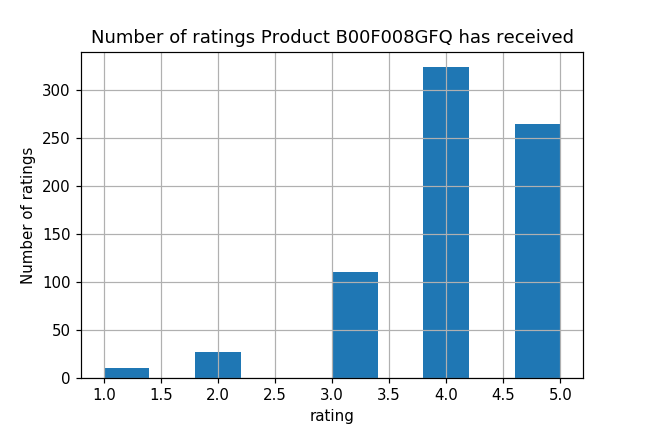

In [388]:
import matplotlib.pyplot as plt
%matplotlib notebook
new_df.loc[new_df['ProductId'] == 'B00IALDHDI']['Rating_y'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings Product B00F008GFQ has received')
plt.show();

In [ ]:
# second tutorial

In [389]:
new_df.head()

,UserId,ProductId,Rating_y
0,A28YD0C5R271J,B00IALDHDI,2.0
1,A7Z525G1C7H43,B00IALDHDI,5.0
2,A3K6YKRIJACMGX,B00IALDHDI,2.0
3,A6JSG8SDKLSST,B00IALDHDI,4.0
4,A39IC46L32EZVH,B00IALDHDI,4.0


In [390]:
lower_rating = new_df["Rating_y"].min()
higher_rating = new_df["Rating_y"].max()
print("review range: {0} to {1}".format(lower_rating,higher_rating))

review range: 1.0 to 5.0


In [391]:
import surprise

In [392]:
alg = surprise.SVDpp()
output = alg.fit(data.build_full_trainset())

In [393]:
pred = alg.predict(uid="55", iid="52")
score = pred.est
print(score)

4.3173029251363415


In [184]:
dataset

In [394]:
productids = Final["ProductId"].unique()
productids50 = Final.loc[Final["UserId"] =="A2G6MTS83KGNS0", "NAME"]
iids_to_pred = np.setdiff1d(productids, productids50)

In [395]:
testset = [[55,iid,4.] for iid in iids_to_pred]
predictions = alg.test(testset)
predictions[0]

Prediction(uid=55, iid='B00C7DYBX0', r_ui=4.0, est=4.168605791882027, details={'was_impossible': False})

In [405]:
#top prediction???
pred_ratings = np.array([pred.est for pred in predictions])
i_max = pred_ratings.argpartition(4)
iid = iids_to_pred[i_max]
print("Top items for user 50 has following product ids of:{0} with predicted ratings of: {1}".format(iid, pred_ratings[i_max]))

Top items for user 50 has following product ids of:['B00IALDHDI' 'B00C7DYBX0' 'B00FAEOCP0' 'B00HZ7IRSI' 'B00I65AGHI'
 'B00C8YCFU4' 'B00IT1HKV4' 'B00KCFAZTE' 'B00KQBR9FM'] with predicted ratings of: [4.17570767 4.16860579 4.26296744 4.40323318 4.4717349  4.58908395
 4.55914744 4.50887285 4.63172621]


In [406]:
#i kinda prefer the other way of doing it above because it has the product and ratings in order.. one above is scrablemd 

In [407]:
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[Final.index]
            print('Recommendation # ',idx+1,': ',title,'\n')
            n-= 1
            if n == 0:
                break

In [412]:
new_df.head()

,UserId,ProductId,Rating_y
0,A28YD0C5R271J,B00IALDHDI,2.0
1,A7Z525G1C7H43,B00IALDHDI,5.0
2,A3K6YKRIJACMGX,B00IALDHDI,2.0
3,A6JSG8SDKLSST,B00IALDHDI,4.0
4,A39IC46L32EZVH,B00IALDHDI,4.0


In [408]:
recommended_movies(ranked_movies,new_df,5)


Recommendation #  1 :                UserId   ProductId  Rating_y
0      A28YD0C5R271J  B00IALDHDI       2.0
1      A7Z525G1C7H43  B00IALDHDI       5.0
2     A3K6YKRIJACMGX  B00IALDHDI       2.0
3      A6JSG8SDKLSST  B00IALDHDI       4.0
4     A39IC46L32EZVH  B00IALDHDI       4.0
5     A2HYVMO5Y57SWG  B00IALDHDI       5.0
6     A3IO5AX2SA0C7P  B00IALDHDI       3.0
7      A2M5KITO5GJIJ  B00IALDHDI       5.0
8     A13SOJ90R63RSV  B00IALDHDI       4.0
9     A1K1STNOMOILXX  B00IALDHDI       4.0
10    A2R8Y26OAJVQ6F  B00IALDHDI       5.0
11     AJDPW7O9NO0BM  B00IALDHDI       5.0
12    A2CBJB1QCBJXWQ  B00IALDHDI       5.0
13    A1PDKZQOY2N9IJ  B00IALDHDI       5.0
14     AM6IRYBRUABZD  B00IALDHDI       5.0
15    A1Y44H87JSA6M9  B00IALDHDI       4.0
16    A1VL3ETFVVIIBT  B00IALDHDI       4.0
17    A186OYG1CMZGK5  B00IALDHDI       4.0
18     A73Y4XEW37EEB  B00IALDHDI       5.0
19    A3N9VFQ70LXCA2  B00IALDHDI       5.0
20    A2QXZCAYVI7OK9  B00IALDHDI       3.0
21    A2JLJFYCSL3ZFY  B00IALDHD

In [190]:
def name_retriever(movie_id,movie_title_df):
    return movie_title_df.where(movie_title_df.movieId == movie_id).take(1)[0]['title']

In [191]:
name_retriever()

TypeError: name_retriever() missing 2 required positional arguments: 'movie_id' and 'movie_title_df'

# help!!

In [413]:
Final
#rating x is mean rating.. then rating y is predicted(or actual?) rating that specific user is / have given to specific product

,CATEGORY,NAME,URL,ProductId,Rating_x,weighted_average,UserId,Rating_y,Timestamp
0,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A28YD0C5R271J,2.0,1404086400
1,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A7Z525G1C7H43,5.0,1404086400
2,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A3K6YKRIJACMGX,2.0,1403740800
3,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A6JSG8SDKLSST,4.0,1404086400
4,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A39IC46L32EZVH,4.0,1403481600
5,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A2HYVMO5Y57SWG,5.0,1403654400
6,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A3IO5AX2SA0C7P,3.0,1403481600
7,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A2M5KITO5GJIJ,5.0,1403568000
8,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A13SOJ90R63RSV,4.0,1403740800
9,Beauty & Personal Care > Makeup > Eyes > Mascara,COVERGIRL Bombshell Curvaceous by LashBlast Ma...,http://www.amazon.com/dp/B00IALDHDI,B00IALDHDI,4.094980,3018.0,A1K1STNOMOILXX,4.0,1404086400


In [290]:
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

lets see which algorithm is going to work best for us! Remeber when choosing algorithm, that sometimes certain algorithms act a certain way when dealing with with either small or large datasets

In [414]:

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.966280,0.111928,0.022158
BaselineOnly,0.970779,0.004506,0.005145
SVD,0.972060,0.138860,0.006762
SVDpp,0.972970,0.185098,0.007057
KNNWithMeans,0.988312,0.078378,0.018673
KNNWithZScore,0.989449,0.144069,0.030797
CoClustering,0.989590,0.208462,0.005441
SlopeOne,0.990402,0.018181,0.007605
KNNBasic,0.991729,0.075565,0.019222


In [415]:
#lets see what ALS looks like
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = KNNBaseline(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.9669791 , 0.99705659, 0.93448692]),
 'fit_time': (0.08398294448852539, 0.05965900421142578, 0.11085391044616699),
 'test_time': (0.022146940231323242,
  0.016083955764770508,
  0.03653287887573242)}

In [416]:
#lets fit this model and see what we get
trainset, testset = train_test_split(data, test_size=0.25)
algo = KNNBaseline(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0094


1.009396188300871

In [419]:
# recommender.py

from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [420]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n




In [422]:


# First train an SVD algorithm on the dataset.
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
#try and get name for product.. not product id.. maybe print link as well?
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28YD0C5R271J ['B00IT1HKV4', 'B00KQBR9FM', 'B00C8YCFU4', 'B00KCFAZTE', 'B00I65AGHI', 'B00HZ7IRSI', 'B00FAEOCP0', 'B00C7DYBX0']
A7Z525G1C7H43 ['B00IT1HKV4', 'B00C8YCFU4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00FAEOCP0', 'B00I65AGHI', 'B00HZ7IRSI', 'B00C7DYBX0']
A3K6YKRIJACMGX ['B00IT1HKV4', 'B00KQBR9FM', 'B00C8YCFU4', 'B00HZ7IRSI', 'B00FAEOCP0', 'B00KCFAZTE', 'B00I65AGHI', 'B00C7DYBX0']
A6JSG8SDKLSST ['B00IT1HKV4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00C8YCFU4', 'B00I65AGHI', 'B00HZ7IRSI', 'B00FAEOCP0', 'B00C7DYBX0']
A39IC46L32EZVH ['B00HZ7IRSI', 'B00C8YCFU4', 'B00KCFAZTE', 'B00I65AGHI', 'B00IT1HKV4', 'B00KQBR9FM', 'B00C7DYBX0', 'B00FAEOCP0']
A2HYVMO5Y57SWG ['B00C8YCFU4', 'B00IT1HKV4', 'B00KQBR9FM', 'B00I65AGHI', 'B00KCFAZTE', 'B00HZ7IRSI', 'B00FAEOCP0', 'B00C7DYBX0']
A3IO5AX2SA0C7P ['B00C8YCFU4', 'B00KQBR9FM', 'B00HZ7IRSI', 'B00KCFAZTE', 'B00IT1HKV4', 'B00FAEOCP0', 'B00I65AGHI', 'B00C7DYBX0']
A2M5KITO5GJIJ ['B00C8YCFU4', 'B00IT1HKV4', 'B00KCFAZTE', 'B00KQBR9FM', 'B00HZ7IRSI', 'B00I65AGHI', 'B00FAEO

A2DRF3WOV53OV4 ['B00C8YCFU4', 'B00KQBR9FM', 'B00IT1HKV4', 'B00KCFAZTE', 'B00HZ7IRSI', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0']
ASS0A2ALJ59GO ['B00KQBR9FM', 'B00C8YCFU4', 'B00KCFAZTE', 'B00I65AGHI', 'B00IALDHDI', 'B00IT1HKV4', 'B00HZ7IRSI', 'B00C7DYBX0']
A1K7KX3ZQW41QA ['B00C8YCFU4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00HZ7IRSI', 'B00I65AGHI', 'B00IT1HKV4', 'B00C7DYBX0', 'B00IALDHDI']
A3QSIAVT4X1BYG ['B00C8YCFU4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00IT1HKV4', 'B00HZ7IRSI', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0']
A27JMHPCFJVEXO ['B00C8YCFU4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00IT1HKV4', 'B00I65AGHI', 'B00HZ7IRSI', 'B00C7DYBX0', 'B00IALDHDI']
APIK80R0EWVO8 ['B00C8YCFU4', 'B00IT1HKV4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00HZ7IRSI', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0']
A1KD6PR8CZ9B0D ['B00C8YCFU4', 'B00IT1HKV4', 'B00KCFAZTE', 'B00KQBR9FM', 'B00HZ7IRSI', 'B00I65AGHI', 'B00C7DYBX0', 'B00IALDHDI']
A21Q3XU3W98Z2L ['B00KCFAZTE', 'B00C8YCFU4', 'B00IT1HKV4', 'B00KQBR9FM', 'B00HZ7IRSI', 'B00I65AGHI', 'B00IA

A2F4AFP2RP4KS7 ['B00KQBR9FM', 'B00C8YCFU4', 'B00IT1HKV4', 'B00KCFAZTE', 'B00FAEOCP0', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0']
A1CUF8F9M8I7E7 ['B00C8YCFU4', 'B00KCFAZTE', 'B00KQBR9FM', 'B00IT1HKV4', 'B00I65AGHI', 'B00FAEOCP0', 'B00IALDHDI', 'B00C7DYBX0']
A28577Z12HO5LP ['B00KQBR9FM', 'B00C8YCFU4', 'B00I65AGHI', 'B00IT1HKV4', 'B00KCFAZTE', 'B00FAEOCP0', 'B00IALDHDI', 'B00C7DYBX0']
A17YLANY7PHWW0 ['B00KQBR9FM', 'B00KCFAZTE', 'B00C8YCFU4', 'B00IT1HKV4', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0', 'B00FAEOCP0']
A1594Z8XCN47OB ['B00KQBR9FM', 'B00C8YCFU4', 'B00IT1HKV4', 'B00KCFAZTE', 'B00I65AGHI', 'B00C7DYBX0', 'B00FAEOCP0', 'B00IALDHDI']
AIE4CY628ULGC ['B00C8YCFU4', 'B00IT1HKV4', 'B00KCFAZTE', 'B00I65AGHI', 'B00KQBR9FM', 'B00FAEOCP0', 'B00IALDHDI', 'B00C7DYBX0']
A1U4B3ZM2YVTK9 ['B00C8YCFU4', 'B00IT1HKV4', 'B00KQBR9FM', 'B00KCFAZTE', 'B00FAEOCP0', 'B00I65AGHI', 'B00IALDHDI', 'B00C7DYBX0']
A3TW6VD4S7MG02 ['B00KCFAZTE', 'B00C8YCFU4', 'B00I65AGHI', 'B00IT1HKV4', 'B00FAEOCP0', 'B00KQBR9FM', 'B00I

In [198]:
import io  # needed because of weird encoding of u.item file

from surprise import KNNBaseline
from surprise import Dataset
from surprise import get_dataset_dir


def read_item_names():

# First, train the algortihm to compute the similarities between items
    trainset = data.build_full_trainset()
    sim_options = {'name': 'pearson_baseline', 'user_based': False}
    algo = KNNBaseline(sim_options=sim_options)
    algo.fit(trainset)

    # Read the mappings raw id <-> movie name
    rid_to_name, name_to_rid = read_item_names()

    # Retrieve inner id of the movie Toy Story
    toy_story_raw_id = name_to_rid['Toy Story (1995)']
    toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

    # Retrieve inner ids of the nearest neighbors of Toy Story.
    toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k=10)

    # Convert inner ids of the neighbors into names.
    toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id)
                           for inner_id in toy_story_neighbors)
    toy_story_neighbors = (rid_to_name[rid]
                           for rid in toy_story_neighbors)

    print()
    print('The 10 nearest neighbors of Toy Story are:')
    for movie in toy_story_neighbors:
        print(movie)

In [199]:
read_item_names()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

RecursionError: maximum recursion depth exceeded while calling a Python object

In [200]:

import pandas as pd
from surprise import Dataset
from surprise import Reader
# >>> from load_data import data
# from recommender import algo

trainingSet = data.build_full_trainset()

algo.fit(trainingSet)
# Computing the cosine similarity matrix...
# Done computing similarity matrix.
# <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f04fec56898>

prediction = algo.predict('E', 2)
prediction.est

4.592493297587131